In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Text(0, 0.5, 'field 1')

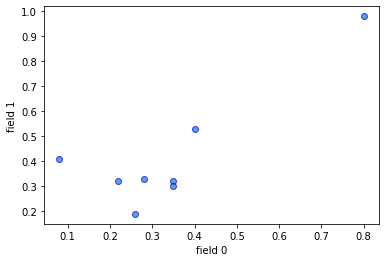

In [ ]:
X = np.array([[0.40,0.53],
              [0.22,0.32],
              [0.35,0.32],
              [0.26,0.19],
              [0.08,0.41],
              [0.35,0.30],
              [0.80,0.98],
              [0.28,0.33]
])
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('field 0')
plt.ylabel('field 1')

Functions to deal with distance matrix of the data set.


Distance calulated between two samples. The two samples can be both samples, both clusters or one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other cases, we refer it as an exception case and pass the samples as parameter to some function that 
calculates the necessary distance between cluster and a sample
  interclusterdist(cl,sample)-to compute the distances between elements of a    cluster(which are samples) and the actual sample given.
   
  
intersampledist(s1,s2)-To be used in case we have one sample and one cluster.

compute_distance()- creates distance matrix of the clusters.

---



In [ ]:
def interclusterdist(cl,sample):
  
  if sample[0]!='<class \'list\'>':
    sample = [sample]
    dist   = []
    for i in range(len(cl)):
      for j in range(len(sample)):
        dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
  return min(dist)



    
def intersampledist(s1,s2):
  '''
  To be used in case we have one sample and one cluster.
  '''
        
  if str(type(s2[0]))!='<class \'list\'>':
    s2=[s2]
  if str(type(s1[0]))!='<class \'list\'>':
    s1=[s1]
  m = len(s1)
  n = len(s2)
  dist = []
  if n>=m:
    for i in range(n):
      for j in range(m):
        if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
          dist.append(interclusterdist(s2[i],s1[j]))
        else:
          dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
  else:
    for i in range(m):
        for j in range(n):
          if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
            dist.append(interclusterdist(s1[i],s2[j]))
          else:
            dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
  return min(dist)

def distance_calculate(sample1,sample2):
        
  dist = []
  for i in range(len(sample1)):
    for j in range(len(sample2)):
      try:
        dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
      except:
        dist.append(intersampledist(sample1[i],sample2[j]))
  return min(dist)
    


def compute_distance(samples):
 
  Distance_mat = np.zeros((len(samples),len(samples)))
  for i in range(Distance_mat.shape[0]):
    for j in range(Distance_mat.shape[0]):
      if i!=j:
        Distance_mat[i,j] = float(distance_calculate(samples[i],samples[j]))
      else:
        Distance_mat[i,j] = 10**4
    return Distance_mat
    
    




The iterative logic which implemnts the logic of hierarchial clustering.
This algorithm reduces the number of clusters one by one until the whole dataset becomes one complete cluster.

In [ ]:
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
Distance_mat = compute_distance(samples)

# the original distace matrix
print("The initial distance matrix-")

print('\n')



while m>1:
    print("the distance matrix for this iterations-")
    Distance_mat = distcal.compute_distance(samples)
    print(Distance_mat)
    print('\n')
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    print('Sample size before clustering    : ',m)
    print('Cluster  1(going to be merged)   :',progression[sample_ind_needed[0]])
    print('Cluster  2(going to be merged)   :',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Current Sample                   :',progression)
    print('Cluster we get                   :',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :',m)
    print('\n')

The initial distance matrix-


the distance matrix for this iterations-
[[1.00000000e+04 2.76586334e-01 2.15870331e-01 3.67695526e-01
  3.41760150e-01 2.35372046e-01 6.02079729e-01 2.33238076e-01]
 [2.76586334e-01 1.00000000e+04 1.30000000e-01 1.36014705e-01
  1.66433170e-01 1.31529464e-01 8.78635305e-01 6.08276253e-02]
 [2.15870331e-01 1.30000000e-01 1.00000000e+04 1.58113883e-01
  2.84604989e-01 2.00000000e-02 7.98811617e-01 7.07106781e-02]
 [3.67695526e-01 1.36014705e-01 1.58113883e-01 1.00000000e+04
  2.84253408e-01 1.42126704e-01 9.56922149e-01 1.41421356e-01]
 [3.41760150e-01 1.66433170e-01 2.84604989e-01 2.84253408e-01
  1.00000000e+04 2.91547595e-01 9.18313672e-01 2.15406592e-01]
 [2.35372046e-01 1.31529464e-01 2.00000000e-02 1.42126704e-01
  2.91547595e-01 1.00000000e+04 8.15414005e-01 7.61577311e-02]
 [6.02079729e-01 8.78635305e-01 7.98811617e-01 9.56922149e-01
  9.18313672e-01 8.15414005e-01 1.00000000e+04 8.32406151e-01]
 [2.33238076e-01 6.08276253e-02 7.07106781e-02 1.4142

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


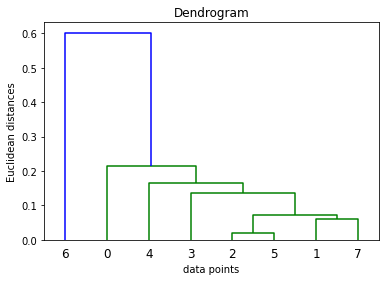

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('data points')
plt.ylabel('Euclidean distances')
plt.show()



Text(0, 0.5, 'field 1')

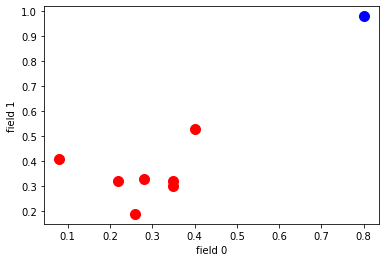

In [ ]:
labels = np.array([0, 0, 0, 0, 0, 0, 1, 0])
X1_cluster1 = np.array([0.4 , 0.22, 0.35, 0.26, 0.08, 0.35, 0.28])
X2_cluster1 = np.array([0.53, 0.32, 0.32, 0.19, 0.41, 0.3 , 0.33])

X1_cluster2 = np.array([0.8])
X2_cluster2 = np.array([0.98])

# Visualising the clusters
plt.scatter(X1_cluster1, X2_cluster1, s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1_cluster2, X2_cluster2, s = 100, c = 'blue', label = 'Cluster 2')
plt.xlabel('field 0')
plt.ylabel('field 1')

Text(0, 0.5, 'field 1')

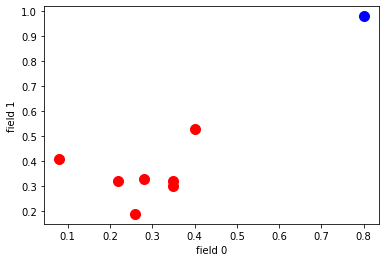

In [ ]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering

# print(dendrogram['color_list'])
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.xlabel('field 0')
plt.ylabel('field 1')